In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lci_data_elec = pd.read_csv('final_electricity_consumption.csv')
lci_data_gas = pd.read_csv('final_gas_consumption.csv')
hague_data = pd.read_excel('Hague_data.xlsx')
del lci_data_gas['BUURTCODE']
del lci_data_gas['Type']
del lci_data_elec['Type']

In [3]:
lci_data = lci_data_elec.merge(lci_data_gas,on=['Name'],how='inner')
hague_data = hague_data[["Naam van het gebied","Aantal inwoners",'Gemiddeld inkomen per inwoner ']]
hague_data.columns = ['Name','Population','Income per capita']
lci_data = lci_data.merge(hague_data,on=['Name'],how='inner')
lci_data['Total_GWP_energy'] = lci_data['net_gwp_green'] + lci_data['net_gwp_nongreen'] + lci_data['GWP_gas ']
lci_data.head()

,Name,green electricity,nongreen electricity,BUURTCODE,net_gwp_green,net_gwp_nongreen,green gas,nongreen gas,GWP_gas,Population,Income per capita,Total_GWP_energy
0,Belgisch Park,822.991371,550.488215,71,10.917063,394.820981,420.708276,281.406289,194.907003,8205,33400.0,600.645047
1,Westbroekpark,877.991941,755.360332,73,11.646651,541.759296,524.620571,451.345338,270.928136,880,53000.0,824.334083
2,Duttendel,924.310008,749.689992,74,12.261065,537.692416,537.389539,435.866275,270.175814,1075,55800.0,820.129295
3,Nassaubuurt,821.711387,618.288613,48,10.900084,443.448762,532.005449,400.302243,258.808615,1625,56200.0,713.157461
4,Uilennest,828.823812,654.223807,75,10.994431,469.222189,441.836224,348.759015,219.469238,2100,41600.0,699.685858


In [4]:
lci_data_sort = lci_data.sort_values(by=['Total_GWP_energy'],ascending=False)
lci_data_sort = lci_data_sort.reset_index(drop=True)
buurts = lci_data_sort.loc[0:10,'Name']
env_impact = lci_data_sort.loc[0:10,'Total_GWP_energy']

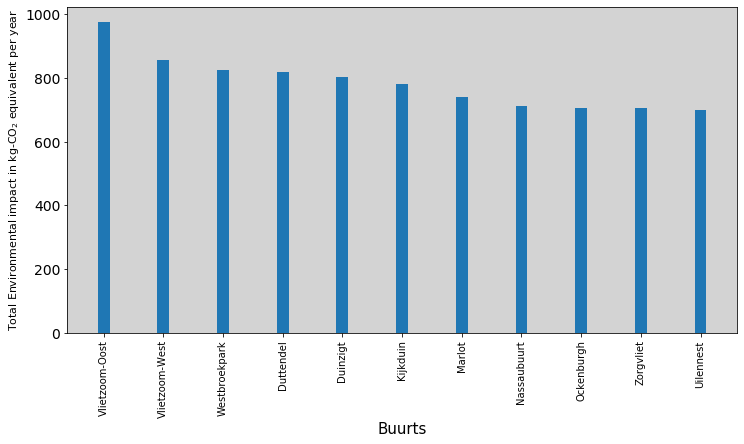

In [5]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.bar(buurts,env_impact,width=0.2)
plt.xlabel('Buurts',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per year',fontsize=11)
#plt.ylim(0,1300)
#plt.xlim(0,20)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

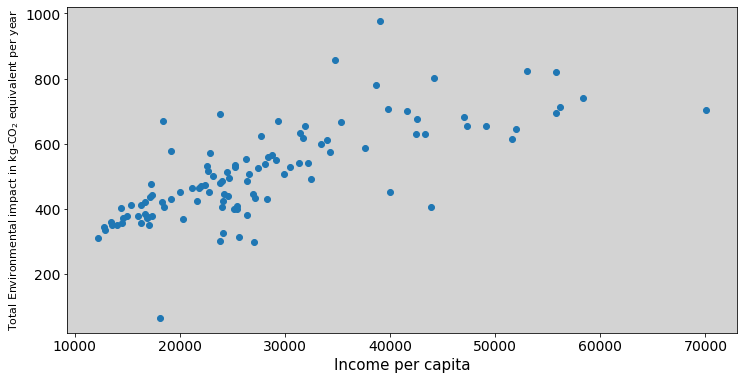

In [6]:
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(lci_data['Income per capita'],lci_data['Total_GWP_energy'])
plt.xlabel('Income per capita',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per year',fontsize=11)
#plt.ylim(990,1100)
#plt.xlim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

In [7]:
env_impacts = ['net_gwp_green','net_gwp_nongreen','GWP_gas ']
curr_impact = 0
averaged_impact = []
population = 0
for impact in env_impacts:
    for i in range(0,len(lci_data)):
        curr_impact = curr_impact + (lci_data.loc[i,impact]*lci_data.loc[i,'Population'])
        population = population + lci_data.loc[i,'Population']
    average = curr_impact/population
    averaged_impact.append(average)
    curr_impact=0
    population = 0

In [42]:
averaged_impact

[9.979489465453577, 314.09653191173453, 144.08430394176648]

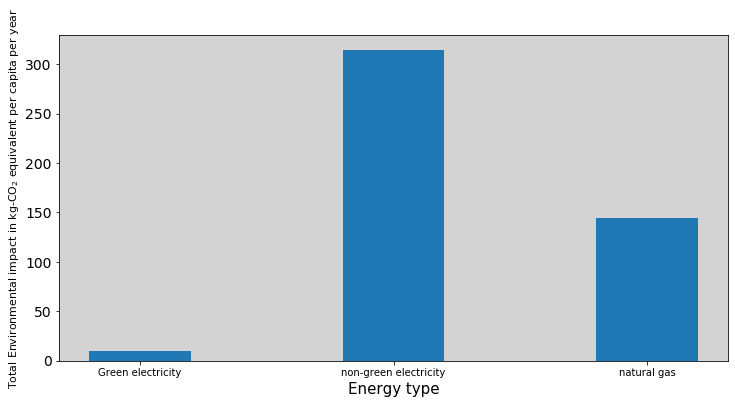

In [9]:
energy_category = ['Green electricity','non-green electricity','natural gas']
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.bar(energy_category,averaged_impact,width=0.4)
plt.xlabel('Energy type',fontsize=15)
plt.ylabel(r'Total Environmental impact in kg-CO$_2$ equivalent per capita per year ',fontsize=11)
#plt.ylim(0,700)
#plt.xlim(0,20)
plt.xticks(rotation=0)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')

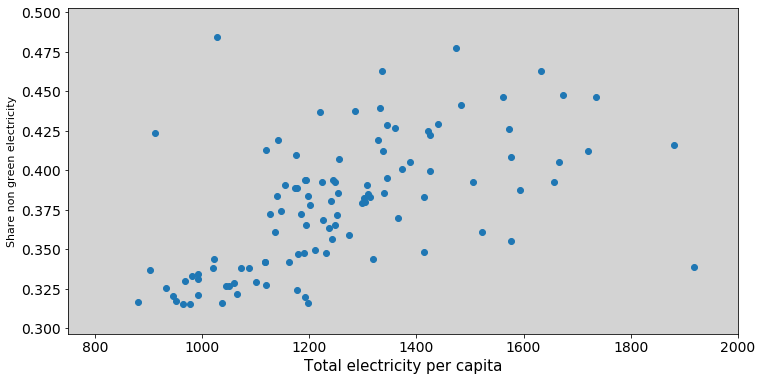

In [51]:
lci_data['total_electricity'] = lci_data['green electricity'] + lci_data['nongreen electricity']
lci_data['share non green electricity'] = lci_data['nongreen electricity']/lci_data['total_electricity']
plt.figure(figsize=(12,6))
ax=plt.axes()
plt.scatter(lci_data['total_electricity'],lci_data['share non green electricity'])
plt.xlabel('Total electricity per capita',fontsize=15)
plt.ylabel(r'Share non green electricity',fontsize=11)
#plt.ylim(990,1100)
plt.xlim(750,2000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('lightgray')